In [2]:
import pandas as pd
from textblob import TextBlob
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/samkatterfield/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
df = pd.read_csv("clothing.csv")

In [6]:
df.head(6)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses


In [7]:
#5 filter the data frame to a relevant subset of columns required for our data scenario (image clothing_columns.png)

df = df.drop(['Clothing ID', 'Age', 'Recommended IND', 'Unnamed: 0', 'Class Name'], axis = 1)

In [8]:
#6 use df.columns.str.lower() (or other preferred method) to standardise your column headers
df.columns = df.columns.str.lower()

In [10]:
df = df.drop('Unnamed: 0', axis = 1)

KeyError: "['Unnamed: 0'] not found in axis"

In [11]:
#EDA - with descriptive statistics (eg describe(), shape, info()) and/or simple charts, explore and familiarise yourself with the data at your own pace - clarify what each column means/contains and what cleaning steps could be employed (and if needed for our scenario)

df.describe()

,rating,positive feedback count
count,23486.000000,23486.000000
mean,4.196032,2.535936
std,1.110031,5.702202
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,1.000000
75%,5.000000,3.000000
max,5.000000,122.000000


In [12]:
df.shape

(23486, 6)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    19676 non-null  object
 1   review text              22641 non-null  object
 2   rating                   23486 non-null  int64 
 3   positive feedback count  23486 non-null  int64 
 4   division name            23472 non-null  object
 5   department name          23472 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


In [14]:
x = df['rating']
y = df['positive feedback count']
z = df['department name']

(array([  842.,     0.,  1565.,     0.,     0.,  2871.,     0.,  5077.,
            0., 13131.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

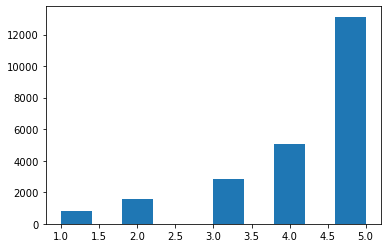

In [15]:
plt.hist(x)

(array([2.2468e+04, 7.3900e+02, 1.7700e+02, 5.3000e+01, 2.1000e+01,
        1.0000e+01, 8.0000e+00, 5.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

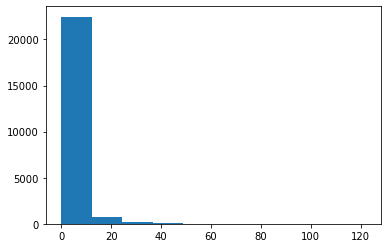

In [16]:
plt.hist(y)

In [17]:
#8 use the pandas groupby function to summarise the average rating by division and department as a new dataframe (image clothing_rating_groupby.png)

group_data = df.groupby(['division name', 'department name'])['rating'].mean()

In [18]:
group_data

division name   department name
General         Bottoms            4.268686
                Dresses            4.163003
                Jackets            4.240310
                Tops               4.148749
                Trend              3.822917
General Petite  Bottoms            4.329356
                Dresses            4.133256
                Intimate           4.240343
                Jackets            4.304910
                Tops               4.216469
                Trend              3.782609
Initmates       Intimate           4.286285
Name: rating, dtype: float64

In [19]:
df['department name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [ ]:
#9 this dataframe can be easily visualised as a bar chart - do so now (image clothing_rating_chart.png)

<AxesSubplot:ylabel='division name,department name'>

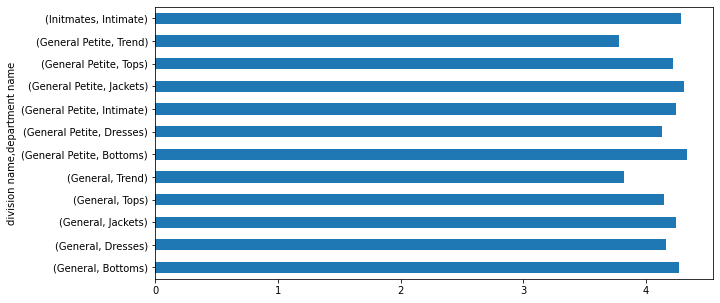

In [22]:

group_data.plot.barh(figsize=(10,5))

In [23]:
#11 do a spot /sample check on the review column, index position 5 (hint: iloc/loc/at) to apply textblob over the selected review text (image clothing_sentiment_index5.png) Do this for at least 3 samples to evaluate the accuracy of the sentiment polarity and subjectivity against the text itself

check = TextBlob(df.iat[5,1])
check2 = TextBlob(df.iat[15,1])
check3 = TextBlob(df.iat[25,1])

In [24]:
print(check)

I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.


In [25]:
check.sentiment


Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [26]:
check2.sentiment

Sentiment(polarity=0.1665873015873016, subjectivity=0.5941269841269842)

In [27]:
check3.sentiment

Sentiment(polarity=0.26150793650793647, subjectivity=0.38690476190476186)

In [30]:
# 12 for the any selected customer review, use textblob to break out the text into sentences (image clothing_sentences.png)
check.sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [33]:
# 13 using dropna, remove any rows in your data which contain have null in the review column ( hint your new data will be 22641 rows)

df = df.dropna(subset = ['review text'])

In [41]:
df[df['review text'].isnull()]

,title,review text,rating,positive feedback count,division name,department name


In [45]:
df

,title,review text,rating,positive feedback count,division name,department name,sentiment_polarity
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,0,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,4,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,0.512891
...,...,...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,0,General Petite,Dresses,0.552667
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,0,General Petite,Tops,0.091667
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,1,General Petite,Dresses,0.414286
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,2,General,Dresses,0.322222


In [ ]:
#there's 22641 rows but index goes to 23485, why?

In [42]:
#14 define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame. (image clothing_sentiment_allrows.png)

def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [47]:
df['sentiment_polarity']=df['review text'].apply(sentiment).apply(lambda x: x[0])

<ipython-input-47-ee30bb0274fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_polarity']=df['review text'].apply(sentiment).apply(lambda x: x[0])


In [48]:
df['subjectivity']=df['review text'].apply(sentiment).apply(lambda x: x[1])

<ipython-input-48-6fb05754b5b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjectivity']=df['review text'].apply(sentiment).apply(lambda x: x[1])


In [64]:
group2 = pd.DataFrame(df.groupby(['division name', 'department name'])['sentiment_polarity'].min())

In [65]:
group2

sentiment_polarity
division name  department name                    
General        Bottoms                   -0.533333
               Dresses                   -0.916667
               Jackets                   -0.750000
               Tops                      -0.975000
               Trend                     -0.270833
General Petite Bottoms                   -0.257778
               Dresses                   -0.400000
               Intimate                  -0.575000
               Jackets                   -0.562500
               Tops                      -0.700000
               Trend                     -0.083333
Initmates      Intimate                  -0.392333

<AxesSubplot:ylabel='division name,department name'>

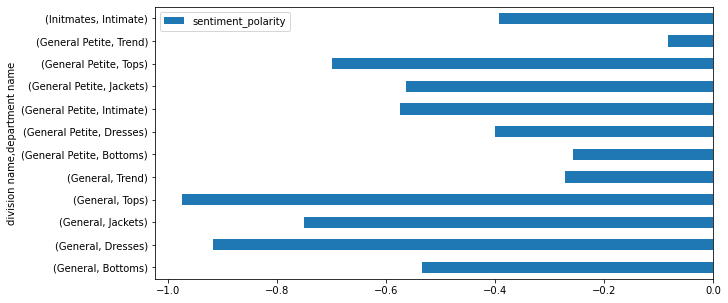

In [69]:
#16 using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe (image clothing_min_review.png)

group2.plot.barh(figsize=(10,5))

<AxesSubplot:ylabel='division name,department name'>

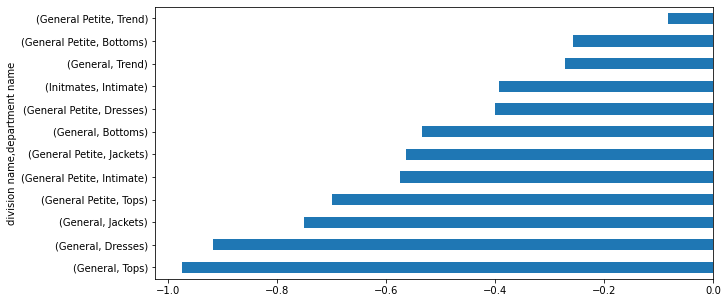

In [84]:
group2 = df.groupby(['division name', 'department name'])['sentiment_polarity'].min().sort_values()
group2.plot(kind='barh',figsize=(10,5))

In [61]:
#17 using the pandas groupby function again, summarise the average review polarity, by division and department as a new dataframe

group3 = pd.DataFrame(df.groupby(['division name', 'department name'])['sentiment_polarity'].mean())

In [90]:
#17 using the pandas groupby function again, summarise the average review polarity, by division and department as a new dataframe

group3 = df.groupby(['division name', 'department name'])['sentiment_polarity'].mean()

<AxesSubplot:ylabel='division name,department name'>

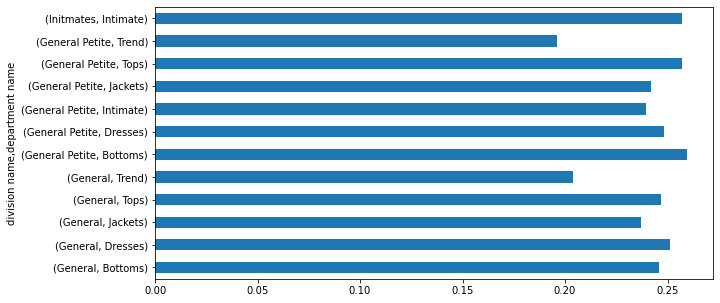

In [91]:
group3.plot(kind='barh',figsize=(10,5))

<AxesSubplot:ylabel='division name,department name'>

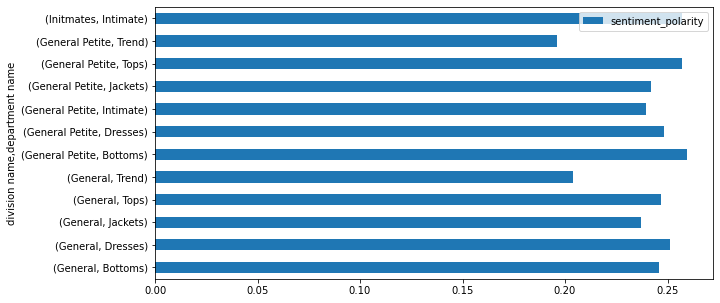

In [62]:
#18 visualise this summary as a simple sorted bar chart
group3.plot.barh(figsize=(10,5))

In [63]:
group3

sentiment_polarity
division name  department name                    
General        Bottoms                    0.245849
               Dresses                    0.251091
               Jackets                    0.237141
               Tops                       0.247025
               Trend                      0.203986
General Petite Bottoms                    0.259258
               Dresses                    0.248380
               Intimate                   0.239517
               Jackets                    0.241773
               Tops                       0.256835
               Trend                      0.195925
Initmates      Intimate                   0.256979

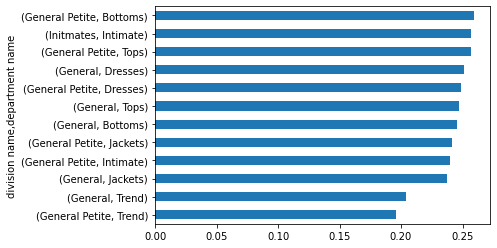

In [66]:
df.groupby(["division name","department name"])['sentiment_polarity'].mean().sort_values().plot.barh();

<AxesSubplot:ylabel='division name,department name'>

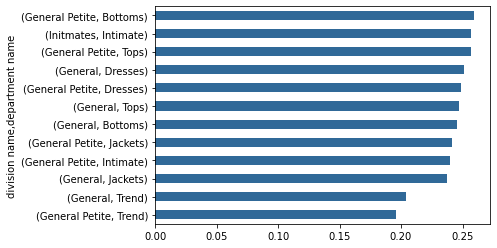

In [67]:
df.groupby(["division name", "department name"])["sentiment_polarity"].mean().sort_values().plot.barh(color = "#306998")

<AxesSubplot:ylabel='division name,department name'>

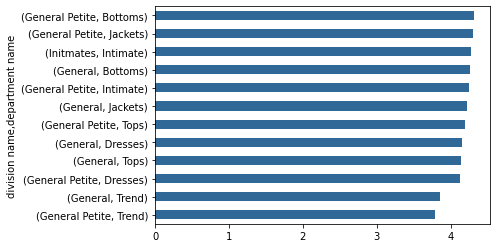

In [75]:
df.groupby(["division name", "department name"])["rating"].mean().sort_values().plot.barh(color = "#306998")

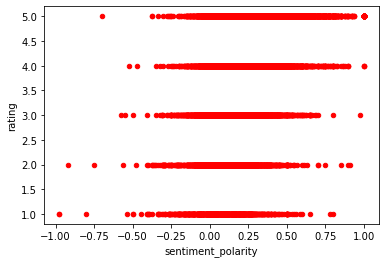

In [76]:
# how accurate is the sentiment polarity calculated on this data set? how can you tell ?


df.plot(kind='scatter',x='sentiment_polarity',y='rating',color='red')
plt.show()

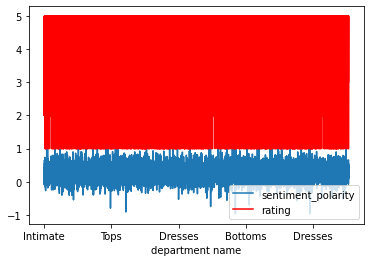

In [77]:
ax = plt.gca()

df.plot(kind='line',x='department name',y='sentiment_polarity',ax=ax)
df.plot(kind='line',x='department name',y='rating', color='red', ax=ax)

plt.show()

In [ ]:
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [92]:
ax1 = sns.catplot(x= 'sentiment_polarity', y= 'department name' , data=group3, hue= 'division name', kind='bar' )

ValueError: Could not interpret input 'sentiment_polarity'

In [88]:
group2.head()

division name   department name
General         Tops              -0.975000
                Dresses           -0.916667
                Jackets           -0.750000
General Petite  Tops              -0.700000
                Intimate          -0.575000
Name: sentiment_polarity, dtype: float64

In [95]:
new_df = df.groupby(["division name", "department name"])["sentiment_polarity"].min().reset_index()
new_df = new_df.sort_values(['sentiment_polarity'], ascending = False)
new_df

,division name,department name,sentiment_polarity
10,General Petite,Trend,-0.083333
5,General Petite,Bottoms,-0.257778
4,General,Trend,-0.270833
11,Initmates,Intimate,-0.392333
6,General Petite,Dresses,-0.400000
0,General,Bottoms,-0.533333
8,General Petite,Jackets,-0.562500
7,General Petite,Intimate,-0.575000
9,General Petite,Tops,-0.700000
2,General,Jackets,-0.750000


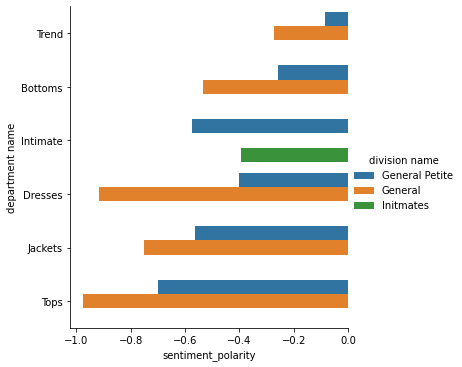

In [97]:
ax1 = sns.catplot(x= "sentiment_polarity", y= "department name" , data=new_df, hue= "division name", kind='bar' )